In [1]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline

In [2]:
# 乱数シードを固定する
random.seed(0)

In [3]:
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 50
# 生成するサイクル数
number_of_cycles = 100

In [4]:
df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df.head()

,t
0,0
1,1
2,2
3,3
4,4


In [5]:
random.uniform(-1.0, +1.0) * random_factor

0.034442185152504814

In [6]:
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle) + random.uniform(-1.0, +1.0) * random_factor))

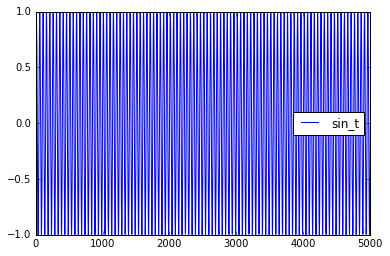

In [7]:
df[["sin_t"]].plot()

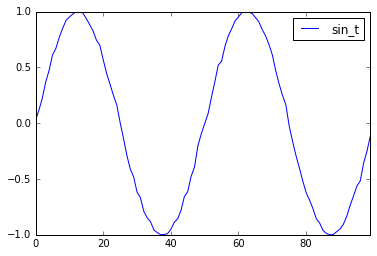

In [8]:
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [9]:
df["sin_t+1"] = df["sin_t"].shift(-1)

In [10]:
df.tail()

,t,sin_t,sin_t+1
4996,4996,-0.460640,-0.322940
4997,4997,-0.322940,-0.200619
4998,4998,-0.200619,-0.148042
4999,4999,-0.148042,-0.015450
5000,5000,-0.015450,NaN


In [11]:
df.dropna(inplace=True)
df.tail()

,t,sin_t,sin_t+1
4995,4995,-0.551502,-0.460640
4996,4996,-0.460640,-0.322940
4997,4997,-0.322940,-0.200619
4998,4998,-0.200619,-0.148042
4999,4999,-0.148042,-0.015450


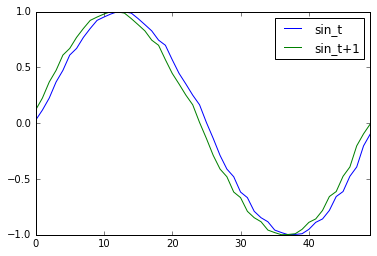

In [12]:
df[["sin_t", "sin_t+1"]].head(steps_per_cycle).plot()

In [13]:
matrix = df[["sin_t", "sin_t+1"]].as_matrix()
matrix

array([[ 0.02579258,  0.11744915],
       [ 0.11744915,  0.22526896],
       [ 0.22526896,  0.36917262],
       ..., 
       [-0.32294043, -0.20061926],
       [-0.20061926, -0.14804184],
       [-0.14804184, -0.01545028]])

In [14]:
np.save("noised.npy", matrix)